# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exercise-9.1.-Spam-email" data-toc-modified-id="Exercise-9.1.-Spam-email-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 9.1. Spam email</a></div><div class="lev1 toc-item"><a href="#Exercise-9.2.-MNIST-classification:-pixels-vs-edge-based-features" data-toc-modified-id="Exercise-9.2.-MNIST-classification:-pixels-vs-edge-based-features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 9.2. MNIST classification: pixels vs edge-based features</a></div><div class="lev1 toc-item"><a href="#Exercise-9.3.-Student-debt" data-toc-modified-id="Exercise-9.3.-Student-debt-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 9.3. Student debt</a></div><div class="lev1 toc-item"><a href="#Exercise-9.5.-Breast-cancer-dataset" data-toc-modified-id="Exercise-9.5.-Breast-cancer-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 9.5. Breast cancer dataset</a></div><div class="lev1 toc-item"><a href="#Exercise-9.7.-Comparing-standard-normalization-to-PCA-sphering-on-MNIST" data-toc-modified-id="Exercise-9.7.-Comparing-standard-normalization-to-PCA-sphering-on-MNIST-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 9.7. Comparing standard normalization to PCA sphering on MNIST</a></div><div class="lev1 toc-item"><a href="#Exercise-9.9.-Exploring-predictors-of-housing-prices" data-toc-modified-id="Exercise-9.9.-Exploring-predictors-of-housing-prices-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 9.9. Exploring predictors of housing prices</a></div><div class="lev1 toc-item"><a href="#Exericise-9.10.-Predicting-Miles-per-Gallon-in-automobiles" data-toc-modified-id="Exericise-9.10.-Predicting-Miles-per-Gallon-in-automobiles-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exericise 9.10. Predicting Miles-per-Gallon in automobiles</a></div><div class="lev1 toc-item"><a href="#Exercise-9.11.--Studying-important-predictors-of-credit-risk" data-toc-modified-id="Exercise-9.11.--Studying-important-predictors-of-credit-risk-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercise 9.11.  Studying important predictors of credit risk</a></div><div class="lev1 toc-item"><a href="#Exercise-9.12.--Exploring-predictors-of-housing-prices" data-toc-modified-id="Exercise-9.12.--Exploring-predictors-of-housing-prices-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise 9.12.  Exploring predictors of housing prices</a></div><div class="lev1 toc-item"><a href="#Exercise-9.13.-Studying-important-predictors-of-credit-risk" data-toc-modified-id="Exercise-9.13.-Studying-important-predictors-of-credit-risk-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Exercise 9.13. Studying important predictors of credit risk</a></div>

In [2]:
# import autograd-wrapped numpy
import autograd.numpy as np

# datapath to data
datapath = '../mlrefined_datasets/superlearn_datasets/'

# Exercise 9.1. Spam email

This dataset can be downloaded via the link below 


```https://archive.ics.uci.edu/ml/datasets/Spambase```

In [2]:
# load data
data = np.loadtxt(datapath + 'spambase_data.csv', delimiter = ',')
x_orig = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x_orig))
print(np.shape(y))
print(x_orig)

(57, 4601)
(1, 4601)
[[0.000e+00 2.100e-01 6.000e-02 ... 3.000e-01 9.600e-01 0.000e+00]
 [6.400e-01 2.800e-01 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [6.400e-01 5.000e-01 7.100e-01 ... 3.000e-01 0.000e+00 6.500e-01]
 ...
 [3.756e+00 5.114e+00 9.821e+00 ... 1.404e+00 1.147e+00 1.250e+00]
 [6.100e+01 1.010e+02 4.850e+02 ... 6.000e+00 5.000e+00 5.000e+00]
 [2.780e+02 1.028e+03 2.259e+03 ... 1.180e+02 7.800e+01 4.000e+01]]


In [3]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad, hessian
import numpy as np
import pandas as pd



dataset = pd.DataFrame(data=x_orig.T, columns=[f"feature {i}" for i in range(len(x_orig))])
dataset["class"] = pd.Series(y.ravel())
dataset

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 48,feature 49,feature 50,feature 51,feature 52,feature 53,feature 54,feature 55,feature 56,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3.0,88.0,-1.0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4.0,14.0,-1.0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6.0,118.0,-1.0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5.0,78.0,-1.0


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_orig.T, y.ravel(), test_size=0.25, random_state = 84
)

len(y_test)

1151

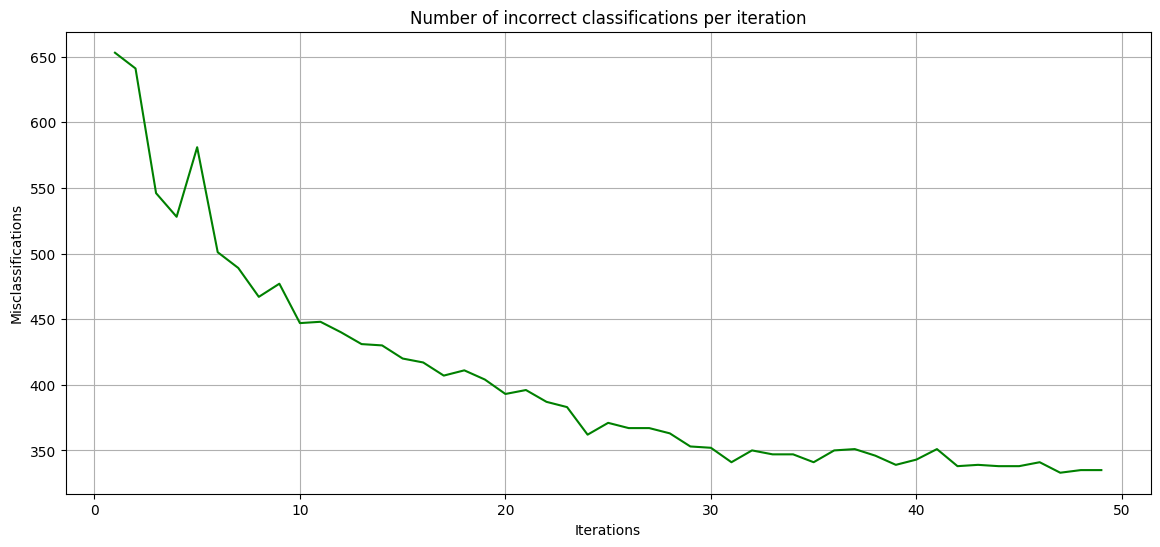

In [5]:
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


def generate_batches(X, y, batch_size):
    """
    param X: np.array[n_objects, n_features] --- матрица объекты-признаки
    param y: np.array[n_objects] --- вектор целевых переменных
    """
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))

    for batch_start in range((len(X) // batch_size)):
        inds = perm[batch_start * batch_size : (batch_start + 1) * batch_size]
        yield (X[inds], y[inds])



# Инициализация модели softmax
model = SGDClassifier(loss='log_loss')


# Ваши данные для обучения
X_train, X_test, y_train, y_test = train_test_split(
    x_orig.T, y.ravel(), test_size=0.25, random_state = 84
)

# Цикл обучения с частичным обновлением модели
epochs = 50
misclassifications = []
for i in range(epochs):
    for X_batch, y_batch in generate_batches(X_train, y_train, batch_size=100):
        # Частичное обновление модели
        model.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
        y_pred = model.predict(X_test)
        inc = round(len(y_test)*(1 - accuracy_score(y_pred, y_test)))
    
    misclassifications.append(inc)
    
        
it = np.arange(0, epochs)
plt.figure(figsize=(14, 6))
plt.plot(it[1:], misclassifications[1:], c="green")
plt.xlabel("Iterations")
plt.ylabel("Misclassifications")
plt.title("Number of incorrect classifications per iteration")
plt.grid(True)
plt.show()

# Exercise 9.2. MNIST classification: pixels vs edge-based features

In [42]:
from sklearn.datasets import fetch_openml
# import MNIST
import pandas as pd
import numpy as np


x, y = fetch_openml('mnist_784', version=1, return_X_y=True)


# re-shape input/output data
x = x.T
y = np.array([int(v) for v in y])[np.newaxis,:]

print(np.shape(x))
print(np.shape(y))

D:\Anaconda\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(784, 70000)
(1, 70000)


In [ ]:
class MultiClassification:
    def __init__(self, X, y):
        self.x = np.column_stack((np.ones(len(X.T)), X.T))
        self.y = y.ravel()

def generate_batches(X, y, batch_size):
    """
    param X: np.array[n_objects, n_features] --- матрица объекты-признаки
    param y: np.array[n_objects] --- вектор целевых переменных
    """
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))

    for batch_start in range((len(X) // batch_size)):
        inds = perm[batch_start * batch_size : (batch_start + 1) * batch_size]
        yield (X[inds], y[inds])

dataset = pd.DataFrame(data=x.T, columns=[f"feature {i}" for i in range(len(x))])
dataset["class"] = pd.Series(y.ravel())
dataset = dataset.fillna(0.0)

In [ ]:
dataset[dataset["feature 2"] > 0] #что-то с данными, одни 0.0.

# Exercise 9.3. Student debt

In [1]:
X_train, X_test, y_train, y_test = train_test_split(
    x.T, y.T, test_size=0.25, random_state = 31
)

X_train

NameError: name 'train_test_split' is not defined

In [6]:
def generate_batches(X, y, batch_size):
    """
    param X: np.array[n_objects, n_features] --- матрица объекты-признаки
    param y: np.array[n_objects] --- вектор целевых переменных
    """
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))

    for batch_start in range((len(X) // batch_size)):
        inds = perm[batch_start * batch_size : (batch_start + 1) * batch_size]
        yield (X[inds], y[inds])

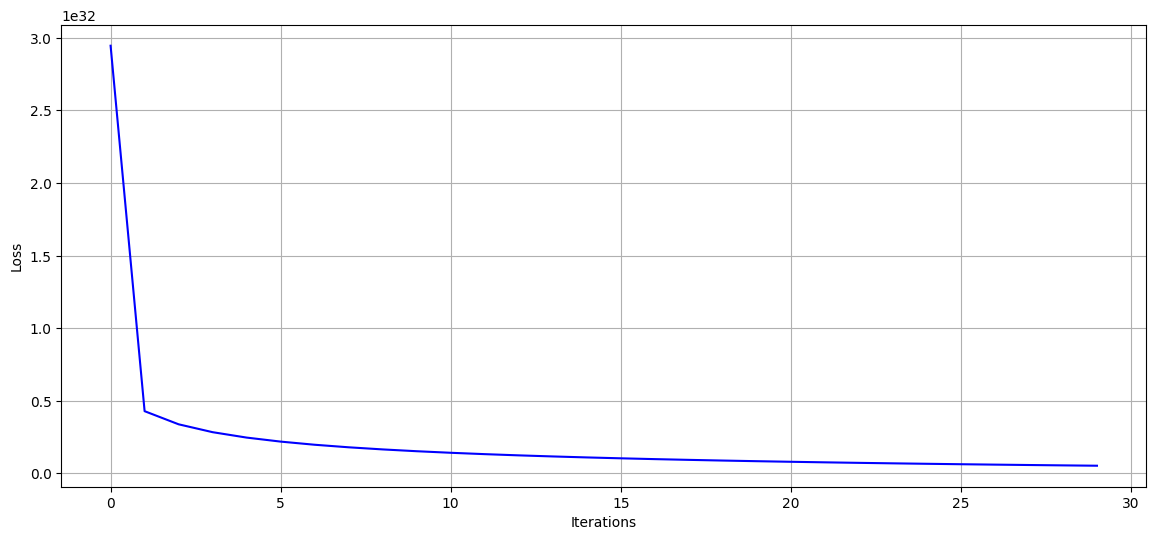

In [79]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split# load data
import matplotlib.pyplot as plt
import autograd.numpy as np
from sklearn.datasets import fetch_openml
# import MNIST
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier, LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad, hessian
import numpy as np
import pandas as pd
import autograd.numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


data = np.loadtxt(datapath + 'student_debt.csv', delimiter = ',')
x = data[:-1,:],
y = data[-1:,:] 


X_train, X_test, y_train, y_test = train_test_split(np.array(x).ravel().T, y.ravel().T, test_size=0.25, random_state = 31)




model = SGDRegressor()
loss_list = []
epochs = 30
def MSE(x, y):
    return jnp.mean(jnp.square(x - y))

for i in range(epochs):
    for X_batch, y_batch in generate_batches(X_train, y_train, batch_size=10):
        X_batch = X_batch.reshape(-1, 1)
        model.partial_fit(X_batch, y_batch)
        y_pred = model.predict(X_test.reshape(-1, 1))
    loss_list.append(MSE(y_pred, y_test))
    
        
it = np.arange(0, epochs)
plt.figure(figsize=(14, 6))
plt.plot(it, loss_list, c="blue")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

[2004.2 2012.2 2008.  2012.  2005.5 2009.2 2012.5 2006.5 2009.  2005.2]
[0.26 0.9  0.55 0.87 0.37 0.66 0.91 0.44 0.64 0.36]
[2.9462745e+32 4.2770761e+31 3.3723034e+31 2.8294515e+31 2.4567041e+31
 2.1798840e+31 1.9634573e+31 1.7879877e+31 1.6418266e+31 1.5175095e+31]
2012.5
0.91


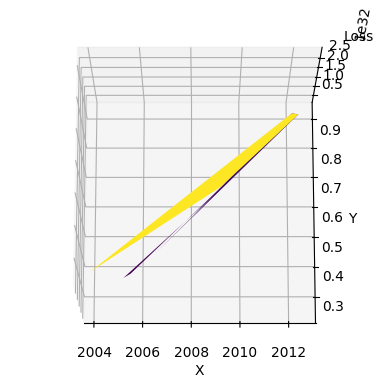

In [80]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = X_test.ravel()
Y = y_test
Z = np.array(loss_list)[:10]
print(X)
print(Y)
print(Z)
print(max(X))
print(max(Y))

x = np.reshape(X, (2, -1))
y = np.reshape(Y, (2, -1))
z = np.reshape(Z, (2, -1))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Loss')
ax.view_init(elev=75, azim=270)
#super_valleyed
plt.show()

[[2004.2]
 [2004.5]
 [2004.8]
 [2005. ]
 [2005.2]
 [2005.5]
 [2005.8]
 [2006. ]
 [2006.2]
 [2006.5]
 [2006.8]
 [2007. ]
 [2007.2]
 [2007.5]
 [2007.8]
 [2008. ]
 [2008.2]
 [2008.5]
 [2008.8]
 [2009. ]
 [2009.2]
 [2009.5]
 [2009.8]
 [2010. ]
 [2010.2]
 [2010.5]
 [2010.8]
 [2011. ]
 [2011.2]
 [2011.5]
 [2011.8]
 [2012. ]
 [2012.2]
 [2012.5]
 [2012.8]
 [2013. ]
 [2013.2]
 [2013.5]
 [2013.8]
 [2014. ]]
[[-0.59039485]
 [ 0.36862216]
 [-0.13486177]
 [ 0.34464674]
 [-0.43455458]
 [ 0.00899078]
 [ 0.4045853 ]
 [-0.31467746]
 [-0.01498464]
 [-0.47051772]]


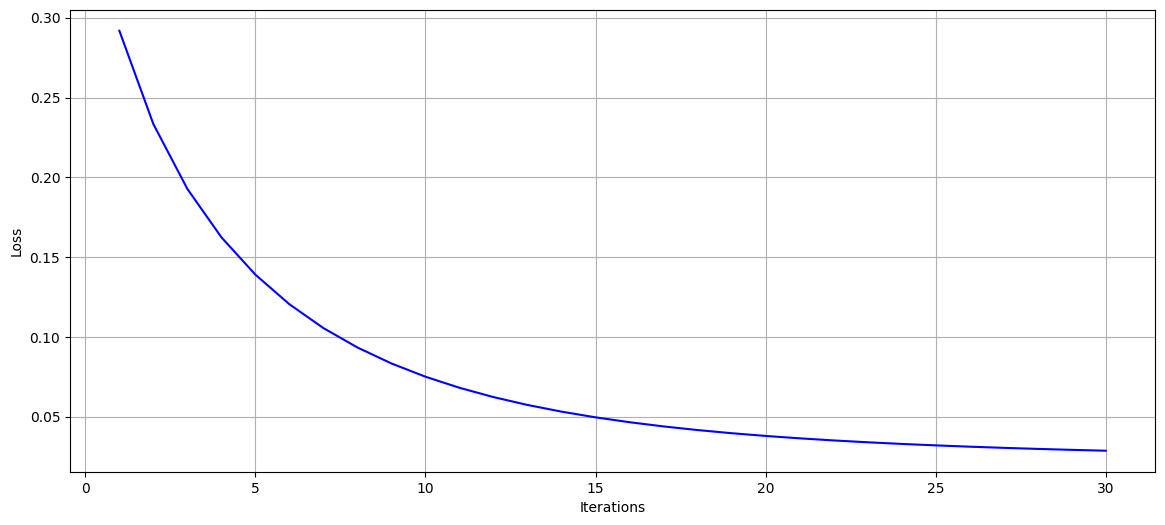

In [81]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split# load data
import matplotlib.pyplot as plt
import autograd.numpy as np
from sklearn.datasets import fetch_openml
# import MNIST
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier, LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad, hessian
import numpy as np
import pandas as pd
import autograd.numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


data = np.loadtxt(datapath + 'student_debt.csv', delimiter = ',')
x = data[:-1,:],
y = data[-1:,:] 
m = x[0].mean()
print(x[0].T)
center = x[0].T - m
d = x[0].var()
x = center / d
X_train, X_test, y_train, y_test = train_test_split(x, y[0], test_size=0.25, random_state = 31)

print(X_test)



model = SGDRegressor()
loss_list = []
epochs = 30
def MSE(x, y):
    return jnp.mean(jnp.square(x - y))

for i in range(epochs):
    for X_batch, y_batch in generate_batches(X_train, y_train, batch_size=10):
        model.partial_fit(X_batch, y_batch)
        y_pred = model.predict(X_test)
    loss_list.append(MSE(y_pred, y_test))
    
        
it = np.arange(1, epochs+1)
plt.figure(figsize=(14, 6))
plt.plot(it, loss_list, c="blue")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

[-0.59039485  0.36862216 -0.13486177  0.34464674 -0.43455458  0.00899078
  0.4045853  -0.31467746 -0.01498464 -0.47051772]
[0.26 0.9  0.55 0.87 0.37 0.66 0.91 0.44 0.64 0.36]
[0.29184997 0.23335074 0.19270974 0.16241    0.13897799 0.12043021
 0.10550442 0.09334233 0.08333327 0.07502833]
0.4045853000674315
0.91


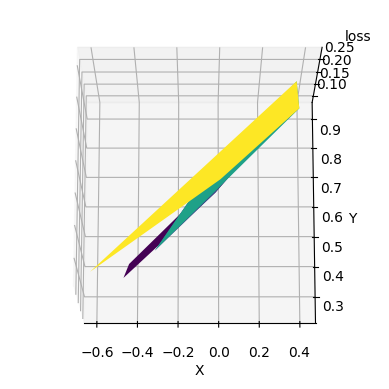

In [82]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = X_test.ravel()
Y = y_test
Z = np.array(loss_list)[:10]
print(X)
print(Y)
print(Z)
print(max(X))
print(max(Y))

x = np.reshape(X, (2, -1))
y = np.reshape(Y, (2, -1))
z = np.reshape(Z, (2, -1))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('loss')
ax.view_init(elev=75, azim=270)

plt.show()

# Exercise 9.5. Breast cancer dataset

The dataset loaded in below can also be found via the following link

```https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)```

In [160]:
# load in original breast cancer dataset
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA


data = np.array(pd.read_csv(datapath + 'breast_cancer_original.txt', header = None))

# cut into input/output pairs
x = data[:,:-1]
y = data[:,-1:]

dataset = pd.DataFrame(data=x, columns=[f"feature {i}" for i in range(len(x.T))])
dataset["class"] = pd.Series(y.ravel()).replace(2, 0).replace(4, 1)

dataset = dataset.apply(pd.to_numeric, errors='coerce')
dataset = dataset.apply(lambda x: x.fillna(x.mean()))
dataset.isna().sum()

feature 0    0
feature 1    0
feature 2    0
feature 3    0
feature 4    0
feature 5    0
feature 6    0
feature 7    0
feature 8    0
feature 9    0
class        0
dtype: int64

In [161]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('class', axis=1), dataset['class'], test_size=0.25, random_state=42)

pipeline = make_pipeline(StandardScaler(), PCA(), SGDClassifier())

param_grid = {
    'sgdclassifier__loss': ['log_loss', 'perceptron'],
    'sgdclassifier__alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 10e-5],
    'sgdclassifier__penalty': ['l2', 'elasticnet'],
    'sgdclassifier__class_weight': ['balanced', None],
    "sgdclassifier__max_iter": [100, 500, 1000, 2000, 5000],
    "sgdclassifier__average": [7],
    "sgdclassifier__n_jobs": [4],
    "pca__n_components": [3, 5, 7, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', refit=True)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [162]:


y_pred = best_model.predict(X_test)
acc_with_standard = accuracy_score(y_pred, y_test)
conf_with = confusion_matrix(y_pred, y_test)
f1std = f1_score(y_pred, y_test)
print(acc_with_standard)
print(grid_search.best_params_)
print(conf_with)
print(f1std)

0.9714285714285714
{'pca__n_components': 5, 'sgdclassifier__alpha': 0.1, 'sgdclassifier__average': 7, 'sgdclassifier__class_weight': 'balanced', 'sgdclassifier__loss': 'perceptron', 'sgdclassifier__max_iter': 5000, 'sgdclassifier__n_jobs': 4, 'sgdclassifier__penalty': 'l2'}
[[115   2]
 [  3  55]]
0.9565217391304347


In [40]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('class', axis=1), dataset['class'], test_size=0.25, random_state=42)

pipeline = make_pipeline(SGDClassifier())

param_grid = {
    'sgdclassifier__loss': ['log_loss', 'perceptron'],
    'sgdclassifier__alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 10e-5],
    'sgdclassifier__penalty': ['l2', 'elasticnet'],
    'sgdclassifier__class_weight': ['balanced', None],
    "sgdclassifier__max_iter": [100, 500, 1000, 2000, 5000],
    "sgdclassifier__average": [7],
    "sgdclassifier__n_jobs": [4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', refit=True)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [41]:
y_pred = best_model.predict(X_test)
acc_no_standard = accuracy_score(y_pred, y_test)
print(acc_no_standard)
print(grid_search.best_params_)


#Итерации примерно одинаковые, но на лицо тот момент, что при стандартном шклаировании в разы возрасла точность, а также не было предупреждений о том, что не сходится.

0.6742857142857143
{'sgdclassifier__alpha': 0.01, 'sgdclassifier__average': 7, 'sgdclassifier__class_weight': None, 'sgdclassifier__loss': 'log_loss', 'sgdclassifier__max_iter': 100, 'sgdclassifier__n_jobs': 4, 'sgdclassifier__penalty': 'l2'}


# Exercise 9.7. Comparing standard normalization to PCA sphering on MNIST

In [43]:
from sklearn.datasets import fetch_openml
# import MNIST
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# re-shape input/output data
x = x.T
y = np.array([int(v) for v in y])[np.newaxis,:]

print(np.shape(x))
print(np.shape(y))
print(x)

D:\Anaconda\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(784, 70000)
(1, 70000)
          0      1      2      3      4      5      6      7      8      \
pixel1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
pixel2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
pixel3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
pixel4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
pixel5      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
pixel780    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
pixel781    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
pixel782    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
pixel783    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
pixel784    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

          9      ...  69990  69991  69992  69993  69994  69995  69996  6999

# Exercise 9.9. Exploring predictors of housing prices

     feature 0  feature 1  feature 2  feature 3  feature 4  feature 5  \
0      0.00632       18.0       2.31        0.0      0.538      6.575   
1      0.02731        0.0       7.07        0.0      0.469      6.421   
2      0.02729        0.0       7.07        0.0      0.469      7.185   
3      0.03237        0.0       2.18        0.0      0.458      6.998   
4      0.06905        0.0       2.18        0.0      0.458      7.147   
..         ...        ...        ...        ...        ...        ...   
501    0.06263        0.0      11.93        0.0      0.573      6.593   
502    0.04527        0.0      11.93        0.0      0.573      6.120   
503    0.06076        0.0      11.93        0.0      0.573      6.976   
504    0.10959        0.0      11.93        0.0      0.573      6.794   
505    0.04741        0.0      11.93        0.0      0.573      6.030   

     feature 6  feature 7  feature 8  feature 9  feature 10  feature 11  \
0         65.2     4.0900        1.0      296.0 

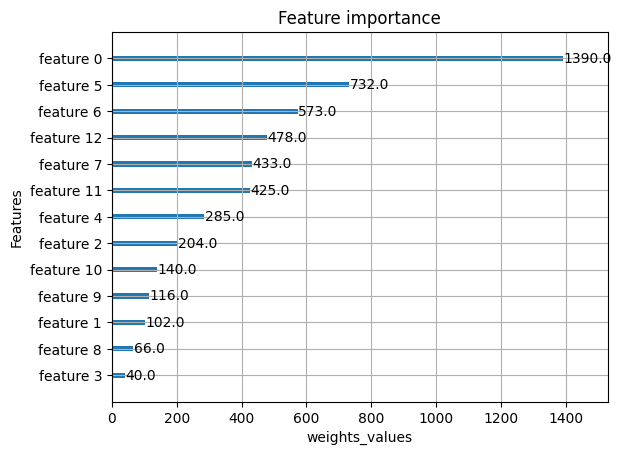

Средняя абсолютная ошибка (MAE): 2.1708883323068684
Средняя квадратичная ошибка (MSE): 11.585989230364431


In [89]:
# load in data
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Я хз как это сделать. Сделаю отбор через градиентный бустинг. Пошло нахуй изоббретение велосипедов. Я обычный работяга, который просто хочет работать с API.

csvname =  datapath + 'boston_housing.csv'
data = np.loadtxt(csvname, delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 


dataset = pd.DataFrame(data=x.T, columns=[f"feature {i}" for i in range(len(x))])
dataset["value"] = pd.Series(y.ravel())
print(dataset)

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('value', axis=1), dataset['value'], test_size=0.25, random_state=41)

model = xgb.XGBRegressor(booster="gbtree", max_depth=10, max_leaves=6, n_estimators=200)
model.fit(X_train, y_train)

plot_importance(model, importance_type='weight', xlabel="weights_values")
plt.show()


y_pred = model.predict(X_test)

# Расчет метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя квадратичная ошибка (MSE):", mse)

# Exericise 9.10. Predicting Miles-per-Gallon in automobiles

(6, 398)
(1, 398)
     feature 0  feature 1  feature 2  feature 3  feature 4  feature 5  value
0          8.0      307.0      130.0     3504.0       12.0       70.0   18.0
1          8.0      350.0      165.0     3693.0       11.5       70.0   15.0
2          8.0      318.0      150.0     3436.0       11.0       70.0   18.0
3          8.0      304.0      150.0     3433.0       12.0       70.0   16.0
4          8.0      302.0      140.0     3449.0       10.5       70.0   17.0
..         ...        ...        ...        ...        ...        ...    ...
393        4.0      140.0       86.0     2790.0       15.6       82.0   27.0
394        4.0       97.0       52.0     2130.0       24.6       82.0   44.0
395        4.0      135.0       84.0     2295.0       11.6       82.0   32.0
396        4.0      120.0       79.0     2625.0       18.6       82.0   28.0
397        4.0      119.0       82.0     2720.0       19.4       82.0   31.0

[398 rows x 7 columns]


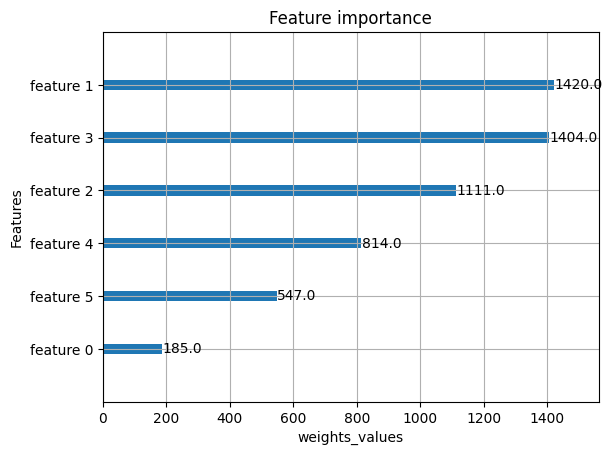

Средняя абсолютная ошибка (MAE): 2.2465620803833004
Средняя квадратичная ошибка (MSE): 9.834814899284714
Среднее квадратичное отклонение (RMSE): 3.1360508444992905


In [90]:
# load in data
from sklearn.metrics import mean_absolute_error, mean_squared_error


csvname =  datapath + 'auto_data.csv'
data = np.loadtxt(csvname, delimiter = ',')
x = data[:-2,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))


dataset = pd.DataFrame(data=x.T, columns=[f"feature {i}" for i in range(len(x))])
dataset["value"] = pd.Series(y.ravel())
print(dataset)

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('value', axis=1), dataset['value'], test_size=0.25, random_state=41)

model = xgb.XGBRegressor(booster="gbtree", max_depth=10, max_leaves=6, n_estimators=200)


model.fit(X_train, y_train)

plot_importance(model, importance_type='weight', xlabel="weights_values")
plt.show()


y_pred = model.predict(X_test)

# Расчет метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя квадратичная ошибка (MSE):", mse)
print("Среднее квадратичное отклонение (RMSE):", rmse)

# Exercise 9.11.  Studying important predictors of credit risk

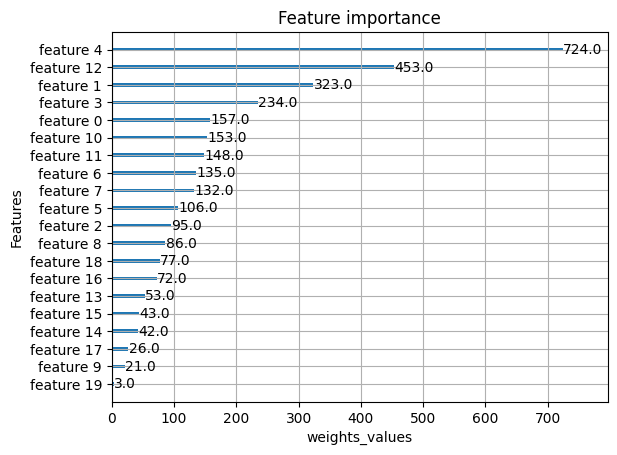

F1 Score:  0.8071216617210683
Accuracy:  0.74


In [94]:
# load in dataset
from sklearn.metrics import f1_score, accuracy_score



csvname = datapath + 'credit_dataset.csv'
data = np.loadtxt(csvname, delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 


dataset = pd.DataFrame(data=x.T, columns=[f"feature {i}" for i in range(len(x))])
dataset["value"] = pd.Series(y.ravel()).replace(-1, 0)


X_train, X_test, y_train, y_test = train_test_split(dataset.drop('value', axis=1), dataset['value'], test_size=0.25, random_state=41)

dataset

model = xgb.XGBClassifier(booster="gbtree", max_depth=10, max_leaves=6, n_estimators=200, objective="binary:logitraw")
model.fit(X_train, y_train)

plot_importance(model, importance_type='weight', xlabel="weights_values")
plt.show()

y_pred = model.predict(X_test)
acc = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)

print("F1 Score: ", f1)
print("Accuracy: ", acc)

# Exercise 9.12.  Exploring predictors of housing prices

In [102]:
from sklearn.linear_model import SGDRegressor, SGDClassifier

csvname =  datapath + 'boston_housing.csv'
data = np.loadtxt(csvname, delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

dataset = pd.DataFrame(data=x.T, columns=[f"feature {i}" for i in range(len(x))])
dataset["value"] = pd.Series(y.ravel())

pipeline = make_pipeline(StandardScaler(), SGDRegressor(penalty="l1", alpha=1))
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('value', axis=1), dataset['value'], test_size=0.25, random_state=42)

pipeline.fit(X_train, y_train)
coefficients = pipeline.named_steps['sgdregressor'].coef_
print(coefficients)

[ 0.          0.          0.          0.08418496  0.          3.05153238
  0.          0.          0.          0.         -1.21164272  0.404561
 -3.52001514]


# Exercise 9.13. Studying important predictors of credit risk

In [128]:
# load in dataset
from sklearn.decomposition import PCA


csvname = datapath + 'credit_dataset.csv'
data = np.loadtxt(csvname, delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

dataset = pd.DataFrame(data=x.T, columns=[f"feature {i}" for i in range(len(x))])
dataset["value"] = pd.Series(y.ravel())

pipeline = make_pipeline(StandardScaler(), SGDClassifier(penalty="l1", alpha=0.025, loss="log_loss"))
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('value', axis=1), dataset['value'], test_size=0.25, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
coefficients = pipeline.named_steps['sgdclassifier'].coef_
print("Weights: ", coefficients)


acc = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)

print("F1 Score: ", f1)
print("Accuracy: ", acc)

Weights:  [[ 0.5309657  -0.32362518  0.24603173  0.          0.          0.23381711
   0.         -0.05758595  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]]
F1 Score:  0.8354430379746834
Accuracy:  0.74
